In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import loginHuggingFace, DiffusersPipelines, DiffusersBaseModel, GenerationParameters, ModelParameters

pipelines = DiffusersPipelines(device = "mps", safety_checker=True, cache_dir=None)
pipelines.loadPresetFile("../../modelconfig.yml")

params = GenerationParameters(
    generationtype = "animatediff",
    prompt = "a photo of an astronaut riding a horse on mars", 
    negprompt = "", 
    steps = 40, 
    cfgscale = 7, 
    width = 512, 
    height = 512, 
    frames = 16,
    scheduler = "EulerDiscreteScheduler", 
    seed = None, 
    models = [ModelParameters(name = "runwayml/stable-diffusion-v1-5")])
frames, seed = pipelines.generate(params)

print(f"Seed: {seed}")

# for image in images:
for frame in frames:
    display(frame)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import loginHuggingFace, DiffusersPipelines, ControlImageParameters, GenerationParameters, ModelParameters
from PIL import Image

pipelines = DiffusersPipelines(device = "mps", safety_checker=True, cache_dir=None)
pipelines.loadPresetFile("../../modelconfig.yml")

image = Image.open("data/rabbit.png")

params = GenerationParameters(
    generationtype = "generate",
    seed = None, 
    controlimages = [ControlImageParameters(image = image)],
    models = [ModelParameters(name = "stabilityai/stable-video-diffusion-img2vid")])
frames, seed = pipelines.generate(params)

print(f"Seed: {seed}")

# for image in images:
for frame in frames:
    display(frame)

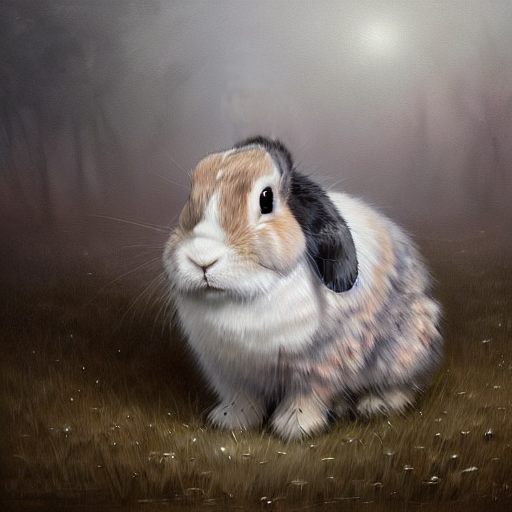

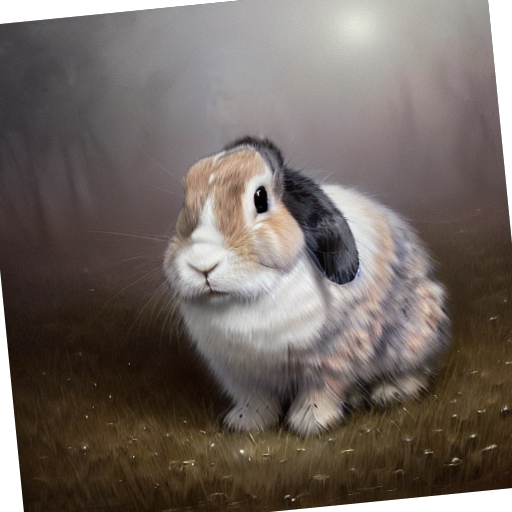

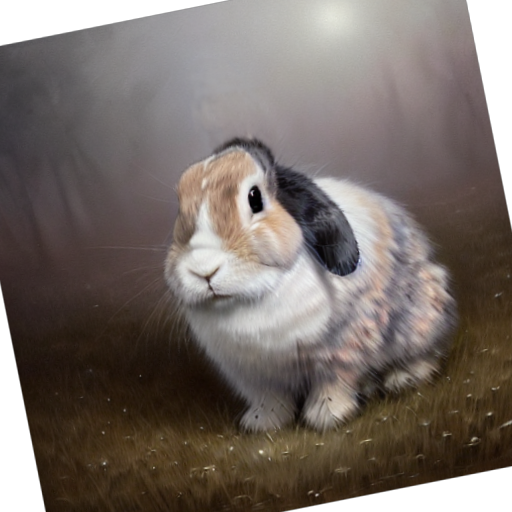

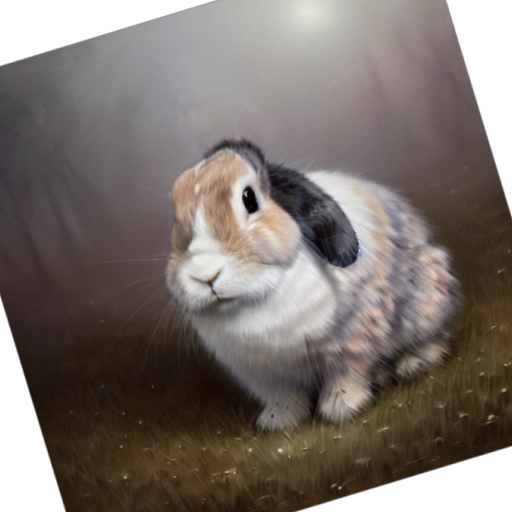

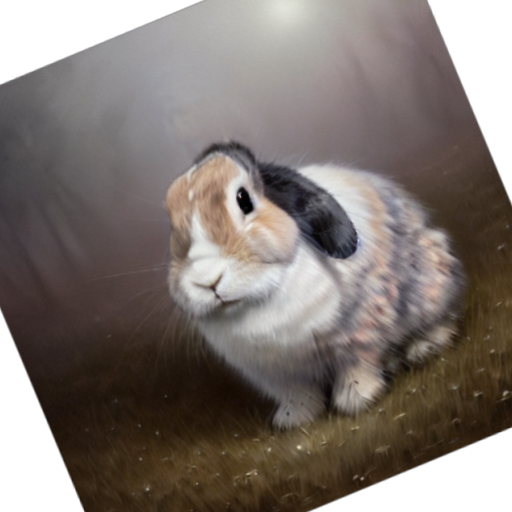

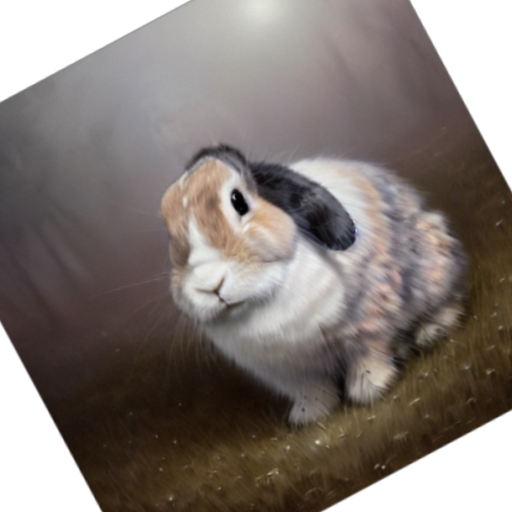

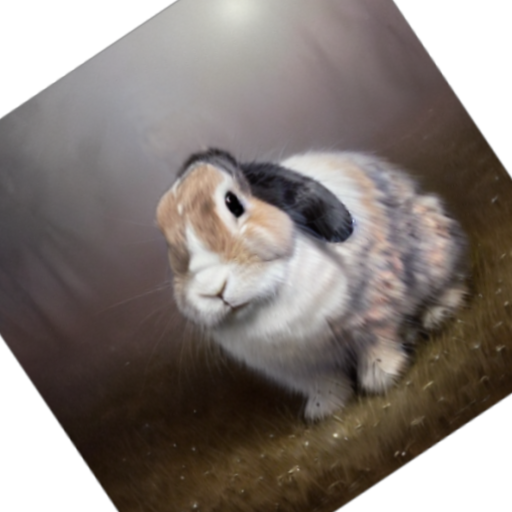

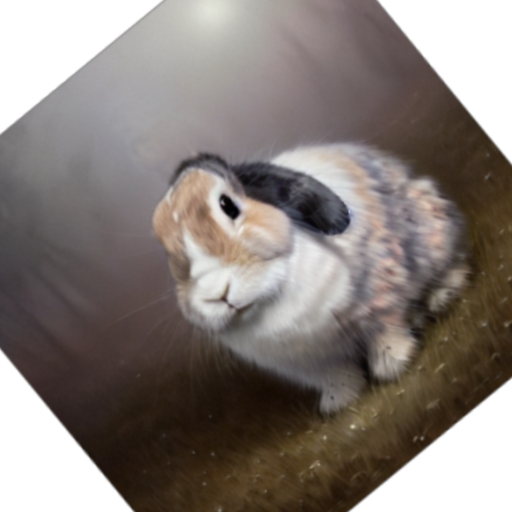

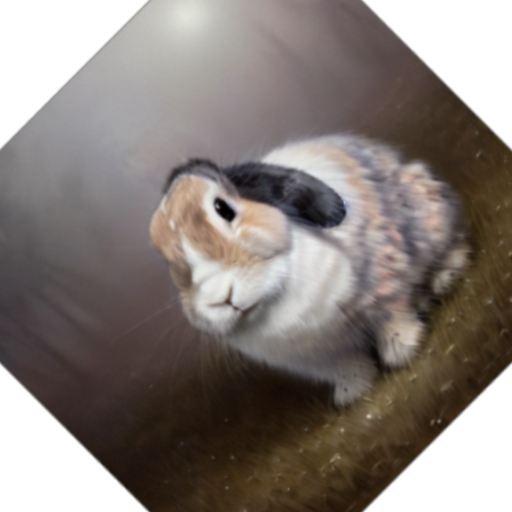

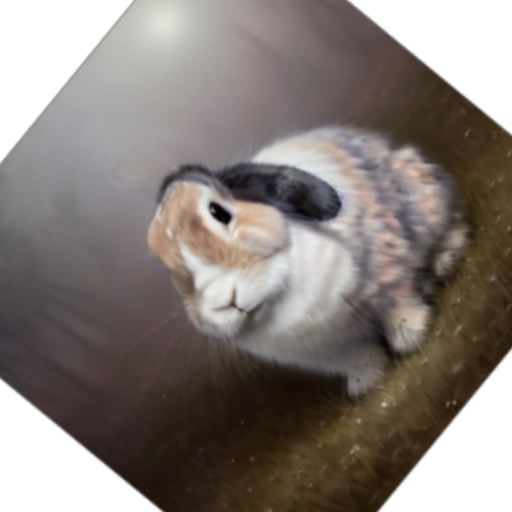

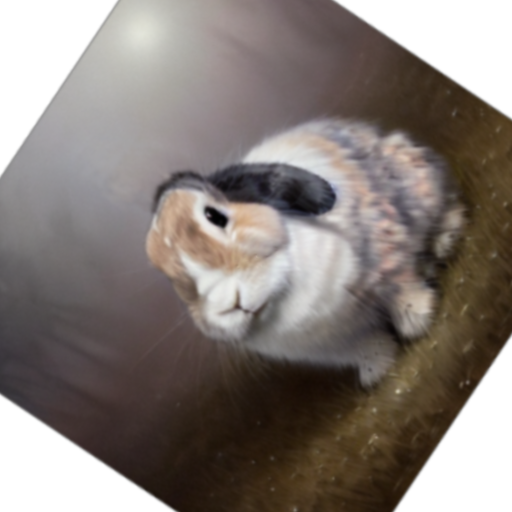

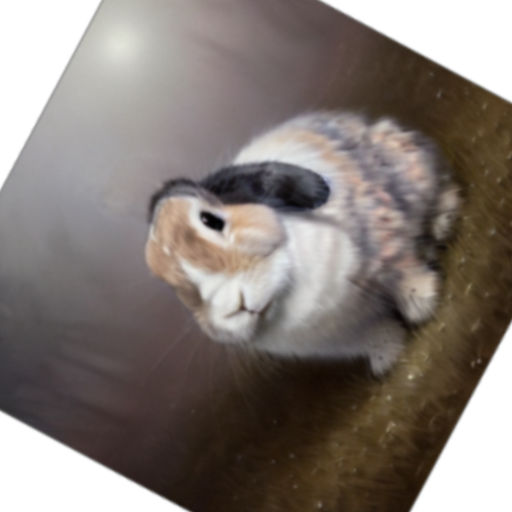

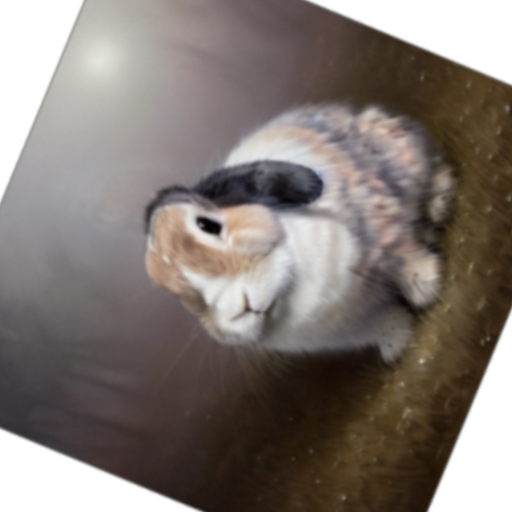

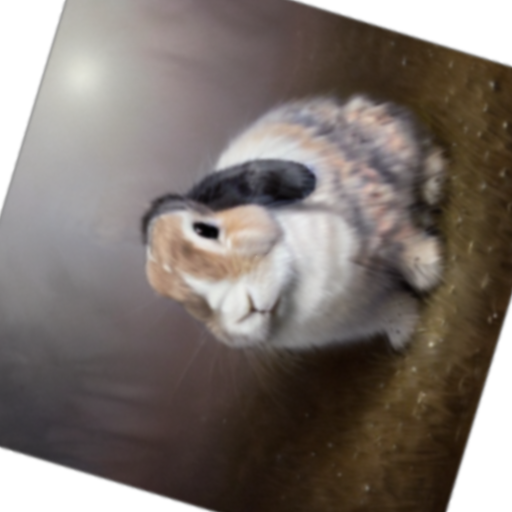

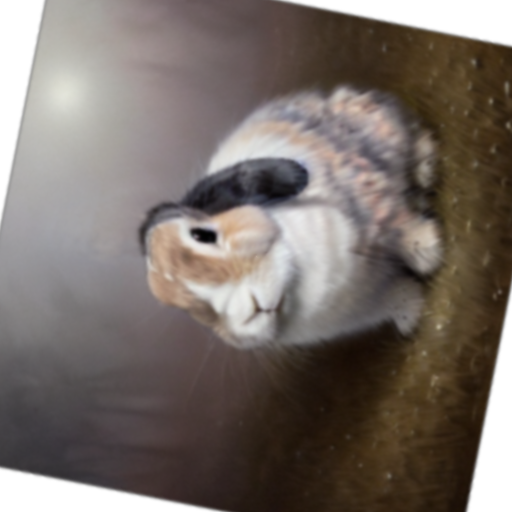

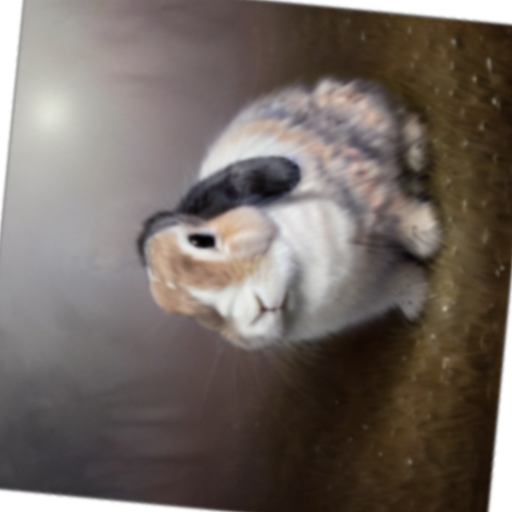

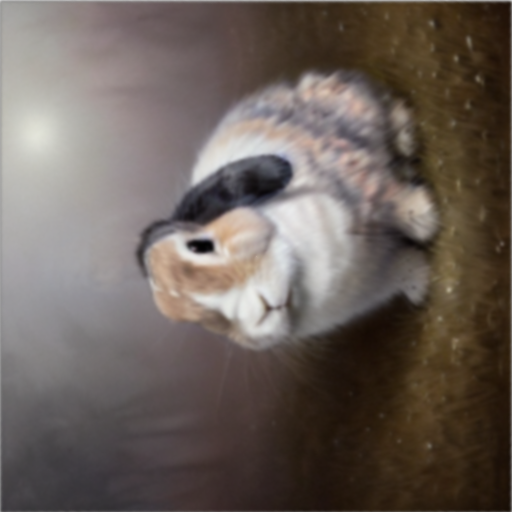

In [1]:
import path
path.setPathLocalNotebook()

from PIL import Image
from diffuserslib import (ImageProcessorPipeline, FrameProcessorPipeline, SequenceRenderer, InitImageProcessor, 
                          DepthEstimationProcessor, RotateMovementProcessor, PlaceholderArgument)

initProcessor = ImageProcessorPipeline()
initProcessor.addTask(InitImageProcessor(image=Image.open("data/rabbit.png")))

def linear(pos:float):
    return pos

frameProcessor = FrameProcessorPipeline(feedForwardIndex=1)
frameProcessor.addTask(InitImageProcessor(image=PlaceholderArgument("feedforward")))
frameProcessor.addTask(RotateMovementProcessor(angle=90, frames=16, interpolation=linear))
# frameProcessor.addTask(DepthEstimationProcessor())

renderer = SequenceRenderer(initImage=initProcessor, frameProcessor=frameProcessor, frames=16)
renderer()
